## The aim is to predict the sales (Item_Outlet_Sale) for the test data.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [89]:
train=pd.read_csv('train_v9rqX0R.csv')

In [90]:
test=pd.read_csv('test_AbJTz2l.csv')

In [91]:
sample=pd.read_csv('sample_submission_8RXa3c6.csv')

## EDA

In [92]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [93]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [94]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [95]:
train.shape

(8523, 12)

In [96]:
test.shape

(5681, 11)

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [98]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [99]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [101]:
train['source']='train'
test['source']='test'

In [102]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [103]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [104]:
data_all=pd.concat([train,test])

In [105]:
data_all.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [106]:
data_all.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [107]:
data_all.shape

(14204, 13)

In [108]:
data_all.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [109]:
data_all.groupby(['Item_Identifier','Item_Type']).Item_Weight.mean().to_frame()

,,Item_Weight
Item_Identifier,Item_Type,
DRA12,Soft Drinks,11.600
DRA24,Soft Drinks,19.350
DRA59,Soft Drinks,8.270
DRB01,Soft Drinks,7.390
DRB13,Soft Drinks,6.115
...,...,...
NCZ30,Household,6.590
NCZ41,Health and Hygiene,19.850
NCZ42,Household,10.500


In [110]:
data_all[data_all['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,train
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,train
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,train
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
5656,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
5661,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
5665,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test


In [111]:
data_all['Item_Weight'].isna().sum()

2439

In [112]:
data_all['Item_Weight']=data_all.groupby(['Item_Identifier','Item_Type']).Item_Weight.transform(lambda x:x.fillna(x.mean()))

In [113]:
data_all['Item_Weight'].isna().sum()

0

In [114]:
data_all.groupby(['Item_Identifier','Item_Type']).Item_Weight.value_counts()

Item_Identifier  Item_Type           Item_Weight
DRA12            Soft Drinks         11.60           8
                                     11.60           1
DRA24            Soft Drinks         19.35           8
                                     19.35           2
DRA59            Soft Drinks         8.27            8
                                                    ..
NCZ41            Health and Hygiene  19.85           1
NCZ42            Household           10.50          10
NCZ53            Health and Hygiene  9.60            9
NCZ54            Household           14.65           8
                                     14.65           2
Name: Item_Weight, Length: 2395, dtype: int64

In [119]:
data_all['Item_Weight'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 14204, dtype: bool

In [120]:
data_all.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [121]:
data_all['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [122]:
data_all['Item_Fat_Content'].replace({'LF' :'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}, inplace=True)

In [123]:
data_all['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [124]:
data_all['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
5676    1997
5677    2009
5678    2002
5679    2007
5680    2002
Name: Outlet_Establishment_Year, Length: 14204, dtype: int64

In [125]:
data_all['outlet_sales']=2023-data_all['Outlet_Establishment_Year']

In [126]:
data_all['outlet_sales']

0       24
1       14
2       24
3       25
4       36
        ..
5676    26
5677    14
5678    21
5679    16
5680    21
Name: outlet_sales, Length: 14204, dtype: int64

In [128]:
data_all

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,26
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,14
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test,21
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test,16


In [130]:
data_all['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [131]:
data_all.groupby(['Outlet_Type']).Outlet_Size.agg(pd.Series.mode)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [135]:
data_all['Outlet_Size'] = data_all.groupby(['Outlet_Type']).Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))


In [136]:
data_all.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
outlet_sales                    0
dtype: int64

In [137]:
data_all['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [139]:
data_all['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [140]:
data_all['Item_Identifier'].str[0:2].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier, dtype: int64

In [141]:
data_all['Item_Identifier']=data_all['Item_Identifier'].str[0:2]

In [142]:
data_all

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,outlet_sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,25
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FD,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,26
5677,FD,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,14
5678,NC,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,test,21
5679,FD,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,test,16


In [143]:
data_numbers = data_all.select_dtypes(include=np.number).drop(columns='Outlet_Establishment_Year')
print (data_numbers)

      Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  outlet_sales
0            9.30         0.016047  249.8092          3735.1380            24
1            5.92         0.019278   48.2692           443.4228            14
2           17.50         0.016760  141.6180          2097.2700            24
3           19.20         0.000000  182.0950           732.3800            25
4            8.93         0.000000   53.8614           994.7052            36
...           ...              ...       ...                ...           ...
5676        10.50         0.013496  141.3154                NaN            26
5677         7.60         0.142991  169.1448                NaN            14
5678        10.00         0.073529  118.7440                NaN            21
5679        15.30         0.000000  214.6218                NaN            16
5680         9.50         0.104720   79.7960                NaN            21

[14204 rows x 5 columns]


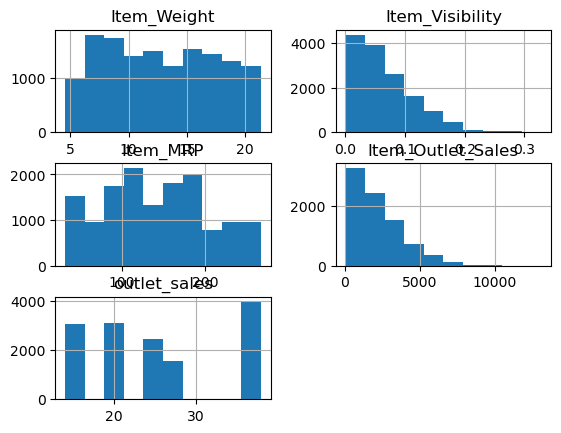

In [144]:
data_numbers.hist()
plt.show()

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
x=data_numbers.drop(columns="Item_Outlet_Sales")
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

           feature       VIF
0      Item_Weight  5.943017
1  Item_Visibility  2.527925
2         Item_MRP  4.919459
3     outlet_sales  6.481066


In [149]:
x.corr()

,Item_Weight,Item_Visibility,Item_MRP,outlet_sales
Item_Weight,1.000000,-0.015412,0.035751,-0.000247
Item_Visibility,-0.015412,1.000000,-0.006351,0.083678
Item_MRP,0.035751,-0.006351,1.000000,-0.000141
outlet_sales,-0.000247,0.083678,-0.000141,1.000000


<AxesSubplot:>

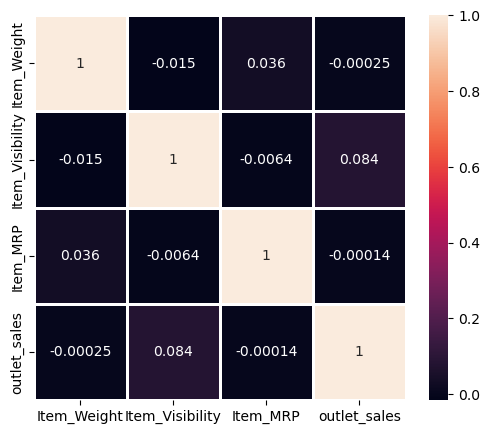

In [152]:
plt.figure(figsize=(6,5))
sns.heatmap(x.corr(),annot = True, linewidth = 1)

In [153]:
scale = StandardScaler()
scaled = scale.fit_transform(data_numbers.drop(columns="Item_Outlet_Sales"))
data_numbers = pd.DataFrame(scaled, columns=data_numbers.drop(columns="Item_Outlet_Sales").columns)

In [154]:
data_numbers

,Item_Weight,Item_Visibility,Item_MRP,outlet_sales
0,-0.751014,-0.969852,1.752511,-0.139681
1,-1.477653,-0.907063,-1.493696,-1.334228
2,1.011839,-0.956000,0.009874,-0.139681
3,1.377308,-1.281712,0.661838,-0.020226
4,-0.830557,-1.281712,-1.403623,1.293777
...,...,...,...,...
14199,-0.493036,-1.019425,0.005000,0.099229
14200,-1.116483,1.497142,0.453249,-1.334228
14201,-0.600527,0.147226,-0.358558,-0.498045
14202,0.538878,-1.281712,1.185747,-1.095319


<Figure size 1500x1000 with 0 Axes>

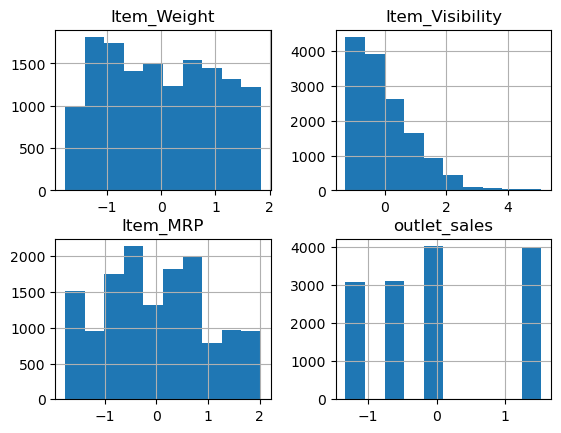

In [155]:
plt.figure(figsize=(15, 10))
data_numbers.hist()
plt.show()

In [157]:
data_category = data_all.select_dtypes(exclude=np.number)
data_category

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FD,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DR,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FD,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FD,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store,train
4,NC,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train
...,...,...,...,...,...,...,...,...
5676,FD,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test
5677,FD,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test
5678,NC,Low Fat,Health and Hygiene,OUT045,Small,Tier 2,Supermarket Type1,test
5679,FD,Regular,Canned,OUT017,Small,Tier 2,Supermarket Type1,test


In [158]:
data_category_one_hot = pd.get_dummies(data_category.drop(columns=['source','Item_Identifier']))
data_category_one_hot.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [160]:
data_numbers = data_numbers.reset_index(drop=True)
data_category_one_hot = data_category_one_hot.reset_index(drop=True )
data_all = data_all.reset_index(drop =True)


In [162]:
data_all.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,outlet_sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,25
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,36


In [163]:
data_category_one_hot.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [164]:
data_numbers.head()

,Item_Weight,Item_Visibility,Item_MRP,outlet_sales
0,-0.751014,-0.969852,1.752511,-0.139681
1,-1.477653,-0.907063,-1.493696,-1.334228
2,1.011839,-0.956000,0.009874,-0.139681
3,1.377308,-1.281712,0.661838,-0.020226
4,-0.830557,-1.281712,-1.403623,1.293777


In [166]:
data_preprocessed = pd.concat([data_numbers, data_category_one_hot, data_all[['Item_Identifier','Outlet_Identifier','source','Item_Outlet_Sales']]], axis = 1)
data_preprocessed

,Item_Weight,Item_Visibility,Item_MRP,outlet_sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier,Outlet_Identifier,source,Item_Outlet_Sales
0,-0.751014,-0.969852,1.752511,-0.139681,1,0,0,0,0,0,...,0,0,0,1,0,0,FD,OUT049,train,3735.1380
1,-1.477653,-0.907063,-1.493696,-1.334228,0,1,0,0,0,0,...,0,1,0,0,1,0,DR,OUT018,train,443.4228
2,1.011839,-0.956000,0.009874,-0.139681,1,0,0,0,0,0,...,0,0,0,1,0,0,FD,OUT049,train,2097.2700
3,1.377308,-1.281712,0.661838,-0.020226,0,1,0,0,0,0,...,0,1,1,0,0,0,FD,OUT010,train,732.3800
4,-0.830557,-1.281712,-1.403623,1.293777,1,0,0,0,0,0,...,0,1,0,1,0,0,NC,OUT013,train,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,-0.493036,-1.019425,0.005000,0.099229,0,1,0,0,0,0,...,0,0,0,1,0,0,FD,OUT046,test,NaN
14200,-1.116483,1.497142,0.453249,-1.334228,0,1,0,0,0,0,...,0,1,0,0,1,0,FD,OUT018,test,NaN
14201,-0.600527,0.147226,-0.358558,-0.498045,1,0,0,0,0,0,...,1,0,0,1,0,0,NC,OUT045,test,NaN
14202,0.538878,-1.281712,1.185747,-1.095319,0,1,0,0,0,1,...,1,0,0,1,0,0,FD,OUT017,test,NaN


In [167]:
data_preprocessed.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'outlet_sales',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_T

In [168]:
data_category_one_hot.columns

Index(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Groce

In [169]:
data_all.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'outlet_sales'],
      dtype='object')

In [170]:
data_all[['Item_Identifier','Outlet_Identifier','source','Item_Outlet_Sales']]

,Item_Identifier,Outlet_Identifier,source,Item_Outlet_Sales
0,FD,OUT049,train,3735.1380
1,DR,OUT018,train,443.4228
2,FD,OUT049,train,2097.2700
3,FD,OUT010,train,732.3800
4,NC,OUT013,train,994.7052
...,...,...,...,...
14199,FD,OUT046,test,NaN
14200,FD,OUT018,test,NaN
14201,NC,OUT045,test,NaN
14202,FD,OUT017,test,NaN


In [171]:
train_preprocessed = data_preprocessed[data_preprocessed['source']=='train'].drop(columns='source')
test_preprocessed = data_preprocessed[data_preprocessed['source']=='test'].drop(columns=['source', 'Item_Outlet_Sales'])

In [172]:
train_preprocessed

,Item_Weight,Item_Visibility,Item_MRP,outlet_sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,-0.751014,-0.969852,1.752511,-0.139681,1,0,0,0,0,0,...,1,0,0,0,1,0,0,FD,OUT049,3735.1380
1,-1.477653,-0.907063,-1.493696,-1.334228,0,1,0,0,0,0,...,0,0,1,0,0,1,0,DR,OUT018,443.4228
2,1.011839,-0.956000,0.009874,-0.139681,1,0,0,0,0,0,...,1,0,0,0,1,0,0,FD,OUT049,2097.2700
3,1.377308,-1.281712,0.661838,-0.020226,0,1,0,0,0,0,...,0,0,1,1,0,0,0,FD,OUT010,732.3800
4,-0.830557,-1.281712,-1.403623,1.293777,1,0,0,0,0,0,...,0,0,1,0,1,0,0,NC,OUT013,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.274495,-0.178196,1.184137,1.293777,1,0,0,0,0,0,...,0,0,1,0,1,0,0,FD,OUT013,2778.3834
8519,-0.948797,-0.368666,-0.529083,-0.498045,0,1,1,0,0,0,...,0,1,0,0,1,0,0,FD,OUT045,549.2850
8520,-0.471537,-0.597910,-0.900101,-0.736955,1,0,0,0,0,0,...,0,1,0,0,1,0,0,NC,OUT035,1193.1136
8521,-1.200326,1.540475,-0.610001,-1.334228,0,1,0,0,0,0,...,0,0,1,0,0,1,0,FD,OUT018,1845.5976


In [173]:
test_preprocessed

,Item_Weight,Item_Visibility,Item_MRP,outlet_sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier,Outlet_Identifier
8523,1.710530,-1.134699,-0.533831,-0.139681,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,FD,OUT049
8524,-0.965996,-0.534917,-0.864708,-1.095319,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,FD,OUT017
8525,0.388391,0.653405,1.622763,-0.020226,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,NC,OUT010
8526,-1.177753,-0.982657,0.225966,-1.095319,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,FD,OUT017
8527,0.173409,1.023121,1.501577,1.532686,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,FD,OUT027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,-0.493036,-1.019425,0.005000,0.099229,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,FD,OUT046
14200,-1.116483,1.497142,0.453249,-1.334228,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,FD,OUT018
14201,-0.600527,0.147226,-0.358558,-0.498045,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,NC,OUT045
14202,0.538878,-1.281712,1.185747,-1.095319,0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,FD,OUT017


In [174]:
train_preprocessed.to_csv("train_preprocessed.csv", index = False)

In [175]:
test_preprocessed.to_csv("test_preprocessed.csv", index = False)